Introduction to Artificial Intelligence - TP2
--

At the end of this session, you will be able to : 
- Perform basic unsupervised learning tasks using sklearn and PyTorch
- Apply unsupervised learning on PyRat datasets 

In [32]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, MiniBatchDictionaryLearning, DictionaryLearning, NMF

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)


# Digits dataset

For this TP we are going to be using the DIGITS dataset. The first thing we are going to do is load the dataset. 

As this is <b>unsupervised</b> we will mostly ignore y (it will only be used for visualization).

Load the model

In [33]:
x_digits, y_digits = load_digits(n_class=10, return_X_y=True)

Visualize some examples

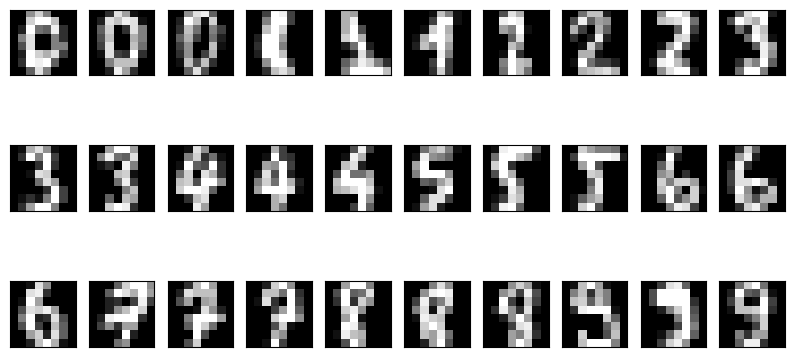

In [34]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(3, 10, 3*i+1)
    
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.subplot(3, 10, 3*i+2)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,3*i+3)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

# Unsupervised Feature Selection

In this part, we will see how to use the [VarianceThreshold](https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance) to remove features with low variance. 

The principle is to compute variance for each feature, and remove the features that have a variance smaller than a threshold. By default, the method removes only features with a variance of zero (their values are always identical).


A word of caution though : the variances are not calculated in the same way whether the set threshold is 0 (the default) or a higher value, as just looking for variances of 0 is done with a method with better numerical precision (see the code [here](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/feature_selection/_variance_threshold.py#L115) for a more in depth explanation). 


In the following, we will use a very small threshold because we will vary the threshold. 

In [35]:
from sklearn.feature_selection import VarianceThreshold

print('original features shape:')
print(x_digits.shape)

thr = 0.1

selector = VarianceThreshold(threshold=thr)
x_digits_new=selector.fit_transform(x_digits)

print('selected features shape')
print(x_digits_new.shape)

print(f"{x_digits.shape[1]-x_digits_new.shape[1]} features were removed")
variances = selector.variances_

original features shape:
(1797, 64)
selected features shape
(1797, 53)
11 features were removed


Let's visualize which features have been removed ! Generate a boolean mask named `mask` that equals True if a feature must be kept, and False othewise. This can be done by thresholding the variances vector.

In [36]:
### TO BE COMPLETED 
# Generate boolean mask
mask = variances > thr

# Print mask
print("Mask for feature selection:")
print(mask)


Mask for feature selection:
[False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False False  True  True  True
  True  True  True False False  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True]


The following figure is organized as follows : 
- the first row shows original examples of the digits dataset
- the second row shows the mask that select features (selected features are in white)
- the third row shows the result of masking the original sample from first row with the mask

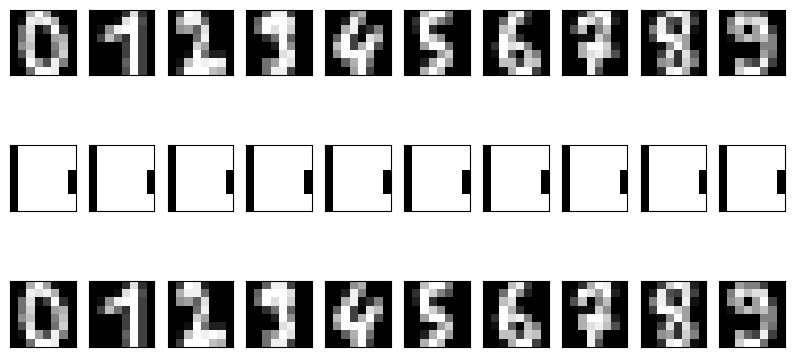

In [37]:
# plots original digits, mask and masked digits 
fig = plt.figure(figsize=(10,5))

for i in range(10):
    
    plt.subplot(3, 10, i+1)
    # pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r = np.random.randint(curX.shape[0])
    curim = curX[r, :].reshape((8,8))
    
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    #plot mask
    plt.subplot(3, 10, i+11)
    plt.imshow(mask.reshape((8,8)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,i+21)
    # plot masked image 
    curim_masked =  curim*mask.reshape((8,8))
    
    plt.imshow(curim_masked,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

By changing the threshold, you can see more or less features being selected (equivalently, features being removed). 

In order to know how to select the threshold, you should examine the distribution of feature variances. First, let's visualize it using a histogram. 

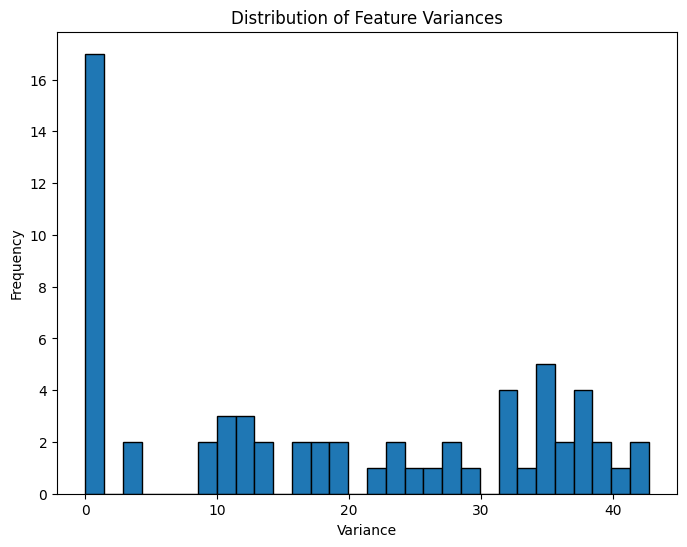

In [38]:
### TO BE COMPLETED : histogram
# Visualize the distribution of feature variances using a histogram
plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

You may take a decision to choose the threshold directly using this plot, but it will not tell you directly how many features are removed. 

We can use the numpy [percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) (use the equivalent nanpercentile if you may have NaN in your features) in order to find the threshold that removes a certain percentage of features

In [39]:
### TO BE COMPLETED :
## use the numpy percentile function to find the threshold to remove a given percentages of features to keep


perc_toremove = 75

# Find the threshold to remove the given percentage of features
thresh_perc = np.percentile(variances, perc_toremove)
print("Threshold to remove {}% of features: {}".format(perc_toremove, thresh_perc))

Threshold to remove 75% of features: 33.85044046390296


Up to how many % features removed can you still recognize the digits ?  (Qualitative, there is no "good answer") 

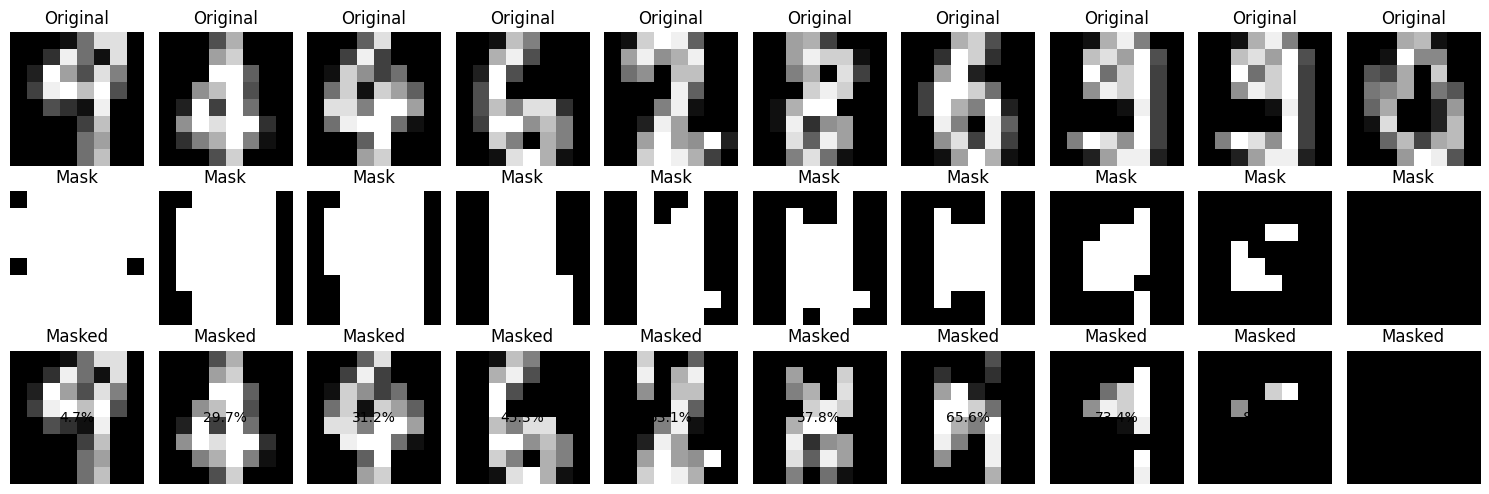

In [40]:
# Define a range of thresholds to test
thresholds_to_test = np.linspace(0, max(variances), num=10)  # Adjust num for granularity

# Initialize a figure to display digits with masks
fig = plt.figure(figsize=(15, 5))

# Loop through each threshold
for idx, thresh in enumerate(thresholds_to_test, start=1):
    # Apply feature selection
    mask = variances > thresh
    x_digits_masked = x_digits[:, mask]
    
    # Calculate percentage of data removed
    percent_removed = (1 - np.sum(mask) / len(mask)) * 100
    
    # Pick a random digit
    i = np.random.randint(0, len(x_digits))
    curim = x_digits[i, :].reshape((8, 8))
    
    # Plot original digit
    plt.subplot(3, len(thresholds_to_test), idx)
    plt.imshow(curim, cmap=plt.cm.gray)
    plt.title("Original")
    plt.axis('off')
    
    # Plot mask
    plt.subplot(3, len(thresholds_to_test), idx + len(thresholds_to_test))
    plt.imshow(mask.reshape((8, 8)), cmap=plt.cm.gray)
    plt.title("Mask")
    plt.axis('off')
    
    # Plot masked digit
    plt.subplot(3, len(thresholds_to_test), idx + 2 * len(thresholds_to_test))
    curim_masked = curim * mask.reshape((8, 8))
    plt.imshow(curim_masked, cmap=plt.cm.gray)
    plt.title("Masked")
    plt.axis('off')
    
    # Display the percentage of data removed
    plt.text(0.5, 0.5, f"{percent_removed:.1f}%", horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()


This part was just to demonstrate a very simple way to remove features in an unsupervised way (you don't need labels). 

You can also check out [other feature selection methods](https://scikit-learn.org/stable/modules/feature_selection.html) for which you will need the labels. Feel free to experiment. 

K-means Clustering 
--

In this part, we demonstrate the use of k-means clustering. 

First, please have a look at the course with notes and read it once again. 

Done ? We will use the [KMeans estimator from sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means). Importantly, here are the key concepts :
- We define a kmeans estimator like this : `kmeans = KMeans(n_clusters)`. The number of clusters has to be decided in advance, using the n_clusters parameter
- The Kmeans clustering is estimated by using the method `fit` on input samples

In [41]:
kmeans=KMeans(n_clusters=10, init='k-means++',random_state=0)

Estimate this clustering on the digits dataset

In [42]:
### to be completed 
# Estimate KMeans clustering on the digits dataset
kmeans.fit(x_digits)

c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=0)

Now we are going to visualize the centroids of the $10$ clusters. First we have to get the center of each cluster. 

After having used the method `fit`, the coordinates of the found centroids will be stored in an attribute named `cluster_centers_`, that you can access by doing `kmeans.cluster_centers_`

In [43]:
### CELL TO COMPLETE, put the cluster centers in variable centroids
# Extract cluster centers
centroids = kmeans.cluster_centers_



We will now plot the clusters centroids. Centroids are points in the same space than the original samples, so we can plot them similarly than the samples of the dataset.

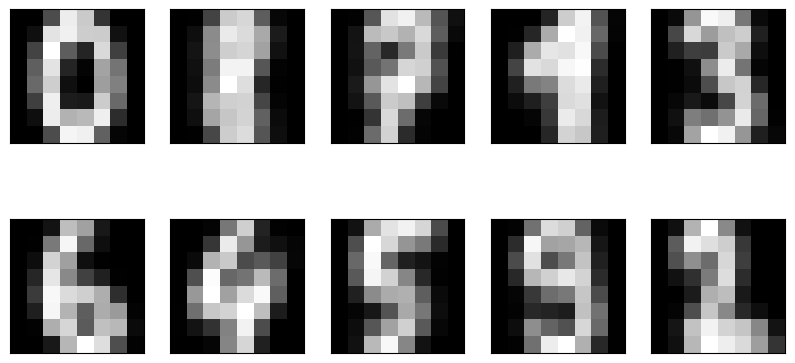

In [44]:
fig = plt.figure(figsize=(10,5))

for i,curcen in enumerate(centroids):
    
    plt.subplot(2, 5, i+1)
    im_cen = curcen.reshape((8,8))
    plt.imshow(im_cen, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

We are now going to take a look in our reconstructions using our KMeans model.

First we take a sample from each class.

In [45]:
### Pick a few random examples 
whichex = np.random.randint(low=0,high=100,size=1) 
X_samp = np.concatenate([x_digits[y_digits==i][whichex] for i in range(10)])
X_samp.shape

(10, 64)


- The `transform` method can be used to estimate distances of samples to the centroids
- The `predict` method, can be used to assign labels of the closest centroid to each sample

Don't hesitate to lookup the help page of these methods using the '?' magic

In [46]:
### CELL TO COMPLETE, use the transform method from the kmeans object on X_samp.
### You will obtain an array containing the distances to the centroids. 
### Use the argmin method from numpy to generate an array containing the index corresponding to the closest centroid to the samples
### Fetch the corresponding centroid in another array closest_centroids.
### And finally calculate the distances of each samples to its closest centroid using np.min

### TO BE COMPLETED 
distances = kmeans.transform(X_samp)  # Calculate distances of samples to centroids
idx_closest_centroids = np.argmin(distances, axis=1)  # Find index of closest centroid
closest_centroids = kmeans.cluster_centers_[idx_closest_centroids]  # Fetch closest centroids
smallest_distances = np.min(distances, axis=1)  # Calculate distances to closest centroids

print(distances.shape, idx_closest_centroids.shape, smallest_distances.shape)

print(smallest_distances)


(10, 10) (10,) (10,)
[17.29204266 17.46884814 37.67339351 18.50444795 25.23917661 23.36035959
 12.72030355 24.66147653 28.19085572 20.59348583]


In [47]:
### verify that the indices of your closest centroids are the same than the ones obtained using the predict method

print(idx_closest_centroids)
print(kmeans.predict(X_samp))

[0 3 2 4 6 7 5 2 1 8]
[0 3 2 4 6 7 5 2 1 8]


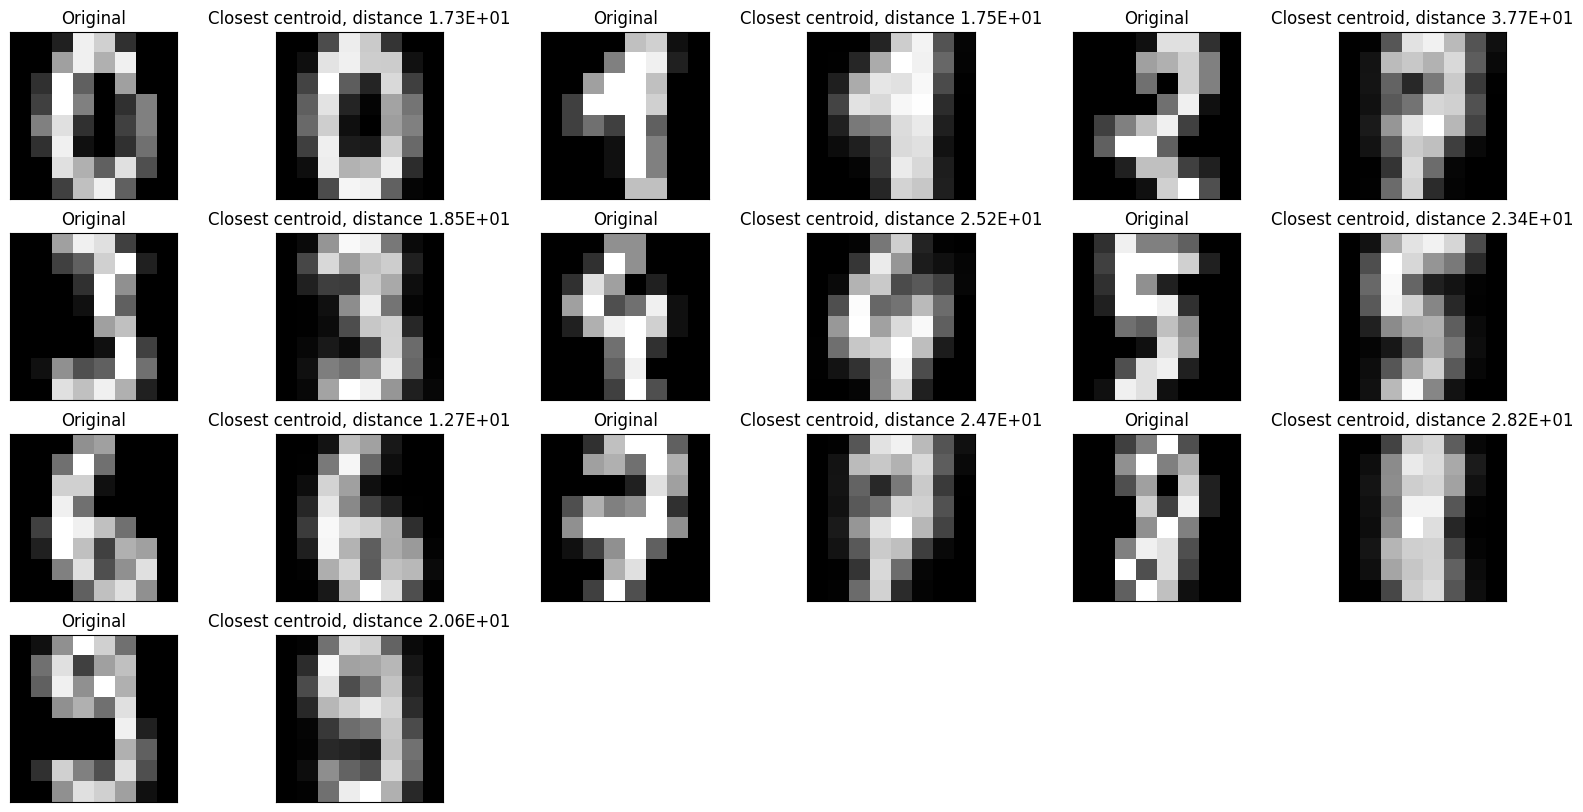

In [48]:
# now we plot the samples ans their closest centroids, together with the distance ( = reconstruction error)

plt.figure(figsize=(20,10))
for i,(im,im_cen,distance) in enumerate(zip(X_samp, closest_centroids, smallest_distances)):
        
    plt.subplot(4, 6, 1+2*i)
    plt.imshow(im.reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")
    
    plt.subplot(4, 6, 2+2*i)
    plt.imshow(im_cen.reshape(8, 8), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Closest centroid, distance %.2E"%distance)


Visualize the elbow method with inertia, by generating KMeans with clusters ranging from 1 to 99, using random state = 0. Inertia is stored in [inertia_](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

  0%|          | 0/99 [00:00<?, ?it/s]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  1%|          | 1/99 [00:00<00:26,  3.70it/s]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  2%|▏         | 2/99 [00:00<00:28,  3.43it/s]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  3%|▎         | 3/99 [00:00<00:27,  3.44it/s

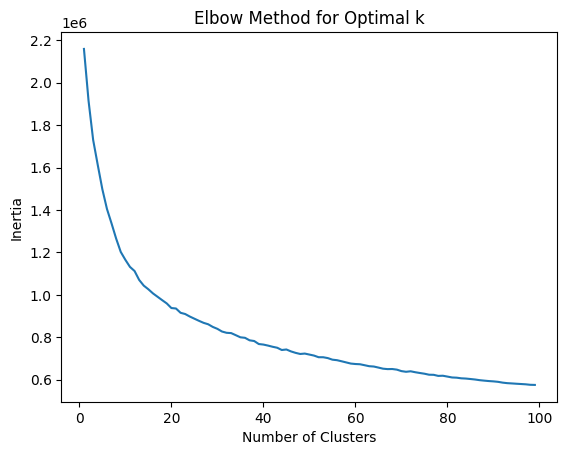

In [49]:
### TO BE COMPLETED:
### generate a KMeans model with varying n_clusters, fit it to the data 
### and add its inertia to the inertia list

import tqdm

inertias = []
nclust = range(1,100)

for i in tqdm.tqdm(nclust):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_digits)
    inertias.append(kmeans.inertia_)

plt.plot(nclust, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Sparse Dictionary Learning  on Digits
--

We are now going to pass to dictionary learning. The first thing is to generate a model using [MiniBatchDictionaryLearning](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html). MiniBatch here means that the method is trained using only a part of the dataset at each time, which helps immensely with the scaling of the method to bigger and wider datasets, but does not guarantee a performance as good as the normal method (where the method see all the dataset at the same time).

Use n_components=$16$, random_state=$0$, batch_size=$3$, max_iter=$1000$ and verbose = $10$ to instantiate your object.

*Note: batch_size and max_iter are set to avoid costly computation.*

The method [fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html#sklearn.decomposition.MiniBatchDictionaryLearning.fit_transform) is more useful than fit in this case, as it returns the transformed version generated by the dictionary (denoted U in the course), *i.e.* the codes associated with the dictionary.

In [50]:
# Instantiate MiniBatchDictionaryLearning object
dictlearn = MiniBatchDictionaryLearning(n_components=16, random_state=0, batch_size=3, max_iter=1000, verbose=10)

We now retrieve each of the components of the dictionary, and plot them so we can visualize the results

In [52]:
components = dictlearn.components_
fig, axis = plt.subplots(4, 4)
for i, d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((8, 8)), cmap=plt.cm.gray, vmin=np.min(components), vmax=np.max(components))
    ax.set_xticks([])
    ax.set_yticks([])

AttributeError: 'MiniBatchDictionaryLearning' object has no attribute 'components_'

Here we can see that the structure of the digits was kept by the components, which means that the digits are always centered and that the rest is a uniform background. 

Now we want to generate some reconstructions, so first we are going to generate some samples.

In [ ]:
whichex = np.random.randint(low=0, high=100, size=1) 
samples = list()
indexes = list()
for i in range(10):
    index = np.where(y_digits==i)[0][whichex]
    samples.append(x_digits[index])
    indexes.append(index)
X_samp = np.concatenate(samples)
indexes = np.array(indexes)

And now we will use the codes obtained using the dictionary and the indexes used to extract the samples to reconstruct the data by using [np.dot]() function to perform matrix multiplication between the sample code and the components from the dictionary.

In [ ]:
### TO BE COMPLETED:
### generate the reconstructions array using the codes and the components.

print(components.shape)
print(codes.shape)
print(x_digits.shape)


Finally, we compare each reconstructed sample with the original one.

In [ ]:
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,10,plot_index*2+1)

    plt.imshow(digit.reshape((8,8)),cmap=plt.cm.gray,vmin=x_digits.min(),vmax=x_digits.max())
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,10,plot_index*2+2)
    plt.imshow(reconstruction.reshape((8,8)),cmap=plt.cm.gray,vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

# Visualization of manifold learning

To give an example of the importance of manifold learning, we train a TSNE model and plot the 2D visualization. We will not get into more details here, but note that TSNE is a very common tool to study data in an unsupervised manner.

In [ ]:
from sklearn.manifold import TSNE

unsup = TSNE(random_state=0)
examples = unsup.fit_transform(x_digits)
plt.scatter(examples[:,0], examples[:,1], c=y_digits)
plt.colorbar()

# Apply Unsupervised Learning to PyRat
The file features_unsupervised.csv contains a list of features extracted from PyRat games. 

In [ ]:
import pandas
features_unsupervised = pandas.read_csv("features_unsupervised.csv", sep=";")

In [ ]:
features_unsupervised


The features are defined as follows : 
- Distance $d(i,j)$ is the shortest path (minimum number of moves) between two positions $i$ and $j$. In particular, we provide the distance between the rat and the python (distance(rat,python)).
- We also provide all distances between the starting position of each player and each cheese.
- The number assigned to the cheese for each player are sorted by ascending distances. (distance(rat,cheese_0) is the distance  to the cheese closest to the rat, distance(rat,cheese_1) is the next closest, etc.. same for python )
- Density of a cheese $c$ is defined as $density(c) = \sum_{c' \neq c}{\frac{1}{d(c,c')}}$
- Density around the starting position of a player $p$ is defined as $density(p) = \sum_{c}{\frac{1}{d(p,c)}}$



You can access the values as a numpy array using `features_unsupervised.values`, as well as all column names using `features_unsupervised.columns`

In [ ]:
features_unsupervised.values

In [ ]:
features_unsupervised.shape

In [ ]:
features_unsupervised.columns.to_list()

A first thing we ask you to do is to fit a Kmeans clustering on this data. As we don't provide labels, you'll have to rely on clustering metrics to evaluate the quality of clustering. You can use `inertia_` as we did above, as well as other unsupervised clustering metrics such as the [silhouette coefficent](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) or the [Calinski Harabasz index](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

In [ ]:
#### TO BE COMPLETED



# PROJECT 2 - mini challenge 

Here are instructions for the next project (to be presented in two weeks - **7 minutes + 3 minutes questions**)

Main Goal : **Assign cluster labels to each provided sample**

During your presentation we will test how well your cluster labels fit with the ground truth labels corresponding to the winner using supervised clustering metric such as the [adjusted rand index](https://scikit-learn.org/stable/modules/clustering.html#rand-index). **Importantly**, you can estimate more than 2 clusters - see the definition of clustering metrics that use ground truth labels, testing for consistency of cluster assignments with ground truth labels. 

You are free to use combination of unsupervised learning techniques, such as : 
- Unsupervised feature selection as done above 
- Manual feature selection and feature engineering (i.e. combining features with a calculation that you define yourself)
- [Feature preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Decomposition techniques](https://scikit-learn.org/stable/modules/decomposition.html#decompositions) (may be used as a first step before clustering)
- [Any clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) implemented in sklearn.
- [Manifold learning](https://scikit-learn.org/stable/modules/manifold.html#manifold)

You can combine any of the techniques mentionned above, feel free to experiment. You can compare your different experiments using the unsupervised metrics we used previouly. 

In order to evaluate your solution, we ask you to provide us with the estimated cluster labels (numpy array named `labels` of shape `(1000,)`) by saving them with the following command : 

`np.savez_compressed('labels_binomeX.npz',labels=labels)`

And post the file in your binome channel just before the presentations start. 



# To go further: semi-supervised Learning on PyRat 

In some situations, data labeling can be pretty expensive, although it is available in large quantity. This can occur when human expertise is required, or when particular resources are needed to determine the label, among other examples. In these cases, one can be interested in what is commonly called *semi-supervised learning*. This paradigm is halfway between supervised and unsupervised learning, and typically consists in attributing labels to unlabeled samples, given a low count of labeled samples of the same classes. Semi-supervised learning can be used to provide a pseudo-label to the unlabeled samples, but also to get better performance than unsupervised learning. Indeed, knowledge of a few labels gives some information that can be exploited.

A way to perform semi-supervised clustering is to use a *nearest class mean* (NCM) classifier. Such a classifier computes a barycenter of the labeled samples of a particular class. Then, unsupervised samples are attributed the label of the closest barycenter. Those barycenters can be computed either directly as a mean of the values of all labeled samples per feature, or on a transformed representation of the samples. Such a transformation can be obtained for instance in the middle layer of an autoencoder.

Consider the following information:
- Rows 20, 140, 257, 394 and 451 in 'features_unsupervised.csv' are of class 0
- Rows 29, 258, 369, 500 and 580 in 'features_unsupervised.csv' are of class 1

Now program a NCM to give labels to all unlabeled samples.

In [ ]:
def nearest_class_mean(train_features, classes, test_features):

    """Nearest class mean classifier
    
    Args:
        train_features (numpy.ndarray): A matrix of training features (n_samples, n_features)
        classes (numpy.array): An array of class labels for each training sample (n_samples,)
        test_features (numpy.ndarray): A matrix of test features (n_samples, n_features)
        
    Returns:
        numpy.ndarray: A list of predicted class labels for each test sample (n_samples,)
    """
    
    #### TO BE COMPLETED

In [ ]:
# Prepare information
labels_1 = [20, 140, 257, 394, 451]
labels_2 = [29, 258, 369, 500, 580]
features_unsupervised = features_unsupervised.astype(float)
train_samples = features_unsupervised.values[labels_1 + labels_2, :]
test_samples = features_unsupervised.values[[i for i in range(features_unsupervised.shape[0]) if i not in labels_1 + labels_2], :]
classes = np.array([0] * len(labels_1) + [1] * len(labels_2))

# Call the nearest class mean classifier
result = nearest_class_mean(train_samples, classes, test_samples)
print(result)